In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance

/home/aerdem/projects/lofo-importance/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from data.test_data import generate_test_data, generate_unstructured_test_data

df = generate_test_data(1000)
df.head()

,A,B,C,D,D2,target,binary_target
0,0.548814,0.592880,0.811518,0.413962,0.443227,1.486305,1
1,0.715189,0.010064,0.476084,0.629618,0.686270,0.529949,0
2,0.602763,0.475826,0.523156,0.778584,0.792326,1.434674,1
3,0.544883,0.708770,0.250521,0.851558,0.886529,1.952046,1
4,0.423655,0.043975,0.605043,0.816413,0.821734,0.480267,0


In [3]:
lr = LinearRegression()
lr.fit(df[["A", "B", "C", "D"]], df["target"])

fi = FLOFOImportance(lr, df, ["A", "B", "C", "D"], 'target', scoring="neg_mean_absolute_error")

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,val_imp_7,val_imp_8,val_imp_9
1,B,0.540217,0.016008,0.532118,0.544225,0.513259,0.524307,0.525612,0.542536,0.550588,5.682745e-01,0.559869,0.541383
3,D,0.089187,0.002629,0.088832,0.086291,0.087612,0.085380,0.086004,0.090378,0.091582,9.345964e-02,0.090800,0.091527
0,A,0.088167,0.002935,0.090739,0.086158,0.085259,0.093299,0.088281,0.088402,0.083172,9.189529e-02,0.087086,0.087376
2,C,0.000002,0.000033,0.000088,-0.000020,-0.000012,-0.000027,-0.000016,0.000004,0.000031,-8.312825e-07,-0.000002,-0.000021


In [4]:
from sklearn.metrics import make_scorer, mean_absolute_error

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = KFold(n_splits=4, shuffle=True, random_state=0)

dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring=scorer, model=LinearRegression(), cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.447206,0.024244,0.432768,0.418559,0.454714,0.482782
3,A,0.053247,0.006699,0.049021,0.044487,0.060269,0.059213
2,D,0.052560,0.003008,0.051912,0.057638,0.050646,0.050044
0,C,-0.000057,0.000116,0.000119,-0.000165,-0.000023,-0.000159


In [5]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring='accuracy', model=rf, cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.414,0.025377,0.432,0.416,0.436,0.372
2,D,0.040,0.007483,0.032,0.052,0.040,0.036
3,A,0.038,0.012806,0.044,0.024,0.056,0.028
0,C,0.016,0.007483,0.016,0.028,0.008,0.012


In [6]:
df = generate_unstructured_test_data(10000)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, 'roc_auc')

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.210579,0.006848,0.218465,0.199696,0.210972,0.213183
3,A,0.011146,0.006722,0.002382,0.007626,0.014447,0.020127
2,D,0.008892,0.005367,0.000255,0.008582,0.012859,0.013872
0,C,-0.000171,0.004295,-0.001984,-0.005786,0.001156,0.005931


In [7]:
dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D", "E"])
fi = LOFOImportance(dataset, scorer, n_jobs=-1)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
0,E,0.535000,0.004561,0.532726,0.529386,0.541721,0.536167
2,B,0.300475,0.003054,0.299546,0.301227,0.296328,0.304798
4,D,0.047203,0.001125,0.048536,0.047944,0.046706,0.045625
3,A,0.038683,0.001377,0.038191,0.040831,0.037031,0.038679
1,C,-0.000693,0.000305,-0.000725,-0.000689,-0.000249,-0.001109


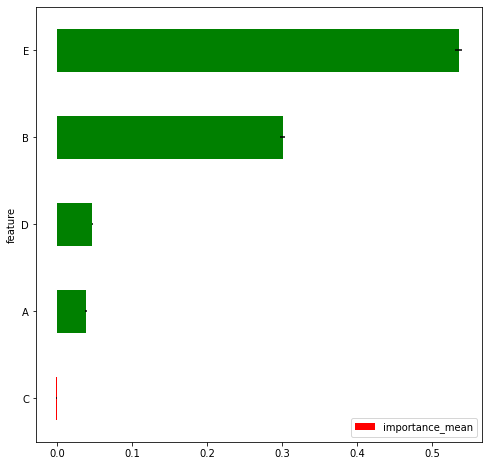

In [8]:
%matplotlib inline
plot_importance(importances)

Automatically grouped features by correlation:
1 ['D', 'D2']


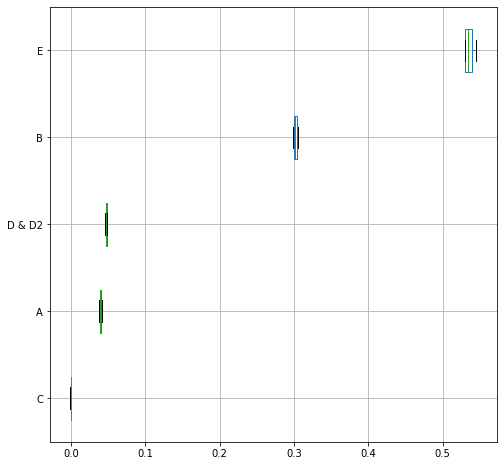

In [9]:
dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D", "D2", "E"], 
                  auto_group_threshold=0.7)
fi = LOFOImportance(dataset, scorer, n_jobs=-1)

importances = fi.get_importance()
importances


plot_importance(importances, kind="box")

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier

df = generate_test_data(1000, text=True)
features = ["A", "B", "C", "D"]

cv = CountVectorizer(ngram_range=(3, 3), analyzer="char")
feature_groups = dict()
feature_groups["names"] = cv.fit_transform(df["T"])
feature_groups["interactions"] = df[["A", "B"]].values*df[["C", "D"]].values

dataset = Dataset(df=df, target="binary_target", features=features, feature_groups=feature_groups)

lgbm = LGBMClassifier(random_state=0, n_jobs=1)

lofo = LOFOImportance(dataset, model=lgbm, cv=4, scoring='roc_auc', n_jobs=4)

importances = lofo.get_importance()
importances

/home/aerdem/projects/lofo-importance/lofo/lofo_importance.py:45: UserWarning: Warning: If your model is multithreaded, please initialise the numberof jobs of LOFO to be equal to 1, otherwise you may experience performance issues.
  warnings.warn(warning_str)


,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
5,names,0.232698,0.025097,2.480101e-01,0.193688,0.229018,0.260076
3,B,0.002641,0.001413,4.608295e-03,0.003212,0.000838,0.001906
2,A,0.000484,0.000535,1.256808e-03,-0.000140,0.000140,0.000681
1,D,-0.000067,0.000205,-1.110223e-16,0.000140,0.000000,-0.000408
4,interactions,-0.000071,0.000155,0.000000e+00,-0.000140,-0.000279,0.000136
0,C,-0.000102,0.000203,-1.396453e-04,0.000140,0.000000,-0.000408
